In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf

# Dataset: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

**Cargar el dataset**

In [ ]:
df_heart = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df_heart.head()

In [ ]:
df_heart.columns

In [ ]:
cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']

df_heart.corr()

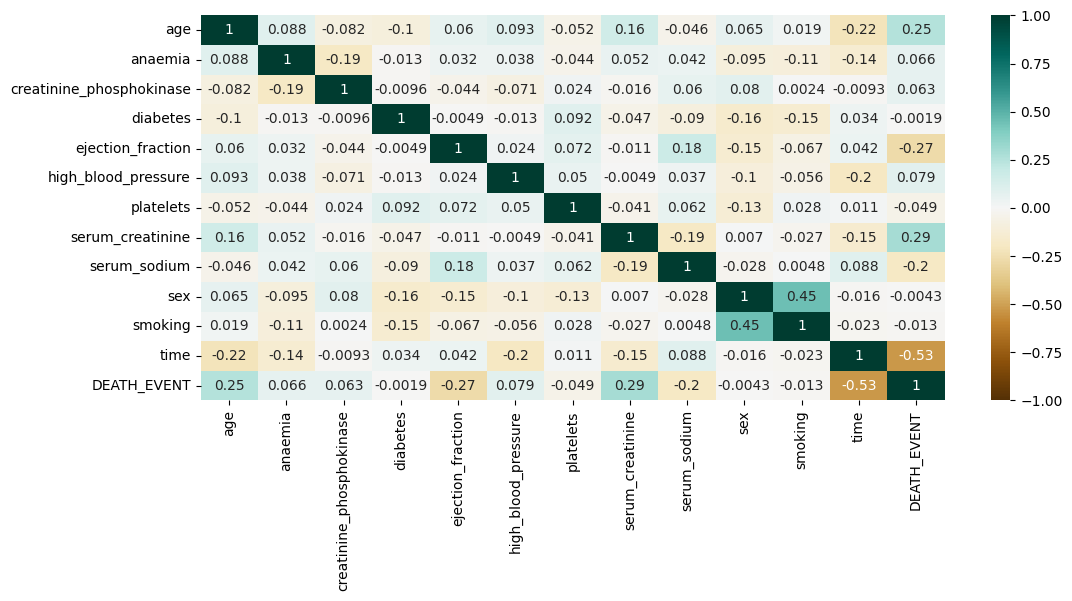

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(
    data=df_heart.corr(),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    annot=True
)
plt.show()

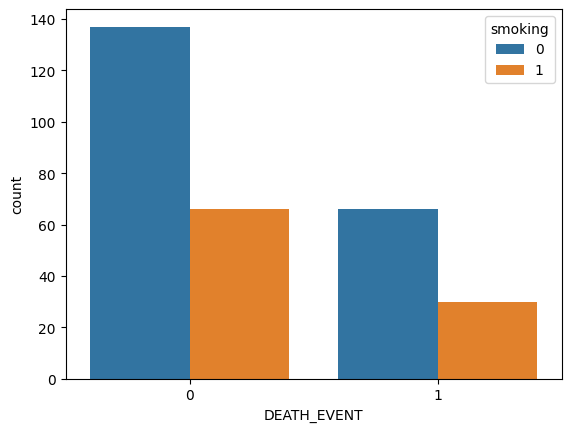

In [23]:
sns.countplot(data=df_heart, x="DEATH_EVENT", hue="smoking")
plt.show()

## Regresión Logística

In [ ]:
smf.logit(
    data=df_heart,
    formula="DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoking + time"
).fit().summary()

In [40]:
model_heart = smf.logit(
    data=df_heart,
    formula="DEATH_EVENT ~ age + ejection_fraction + serum_creatinine + serum_sodium + time"
).fit()
model_heart.summary()

Optimization terminated successfully.
         Current function value: 0.373677
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.4047
Time:                        03:23:51   Log-Likelihood:                -111.73
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.083e-30
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.5089      5.409      1.758      0.079      -1.092      20.110
age                     0.0425      0.015      2.829      0.005       0.013       0.072
ejection_fraction      -0.0735      0.016     -4.652      0.000      -0.104      -0.043
serum_creatinine        0.6856      0.175      3.928      0.000       0.343       1.028
serum_sodium           -0.0645      0.038     -1.680      0.093      -0.140       0.011
time                   -0.0210      0.003     -7.118      0.000      -0.027      -0.015
high_blood_pressure    -0.0576      0.349     -0.165      0.869      -0.741       0.626
=======================================================================================
"""

In [41]:
heart_predictions = pd.DataFrame(
    dict(
        actual_value = df_heart.DEATH_EVENT,
        predicted_value = model_heart.predict().round()
    )
)
heart_predictions

,actual_value,predicted_value
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
294,0,0.0
295,0,0.0
296,0,0.0
297,0,0.0


El modelo tiene una exactitud del 83.0%


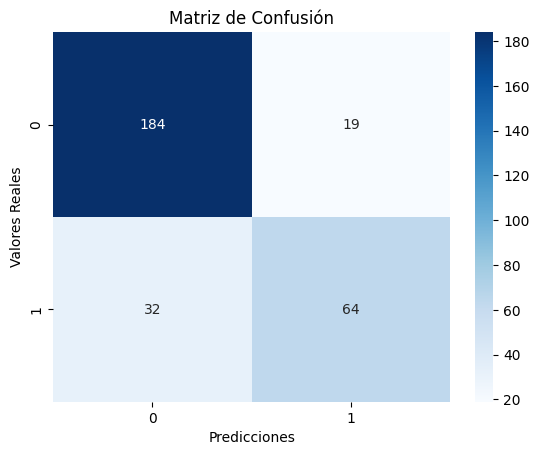

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc_score = accuracy_score(heart_predictions["actual_value"], heart_predictions["predicted_value"])
acc_score = np.round(acc_score,2)*100

print(f"El modelo tiene una exactitud del {acc_score}%")

conf_matrix = confusion_matrix(heart_predictions["actual_value"], heart_predictions["predicted_value"])

sns.heatmap(data=conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()